/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


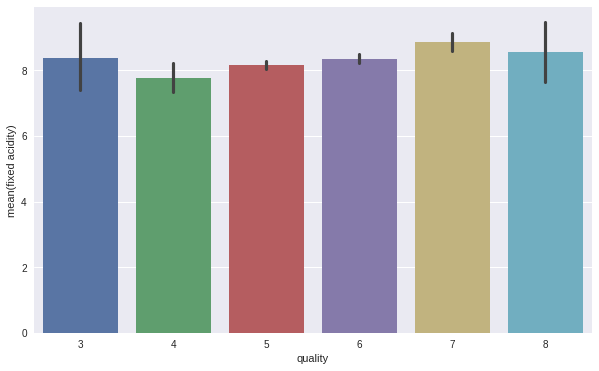

In [32]:
#@title Default title text
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

Exemplo retirado de: [Kaggle - Prediction of quality of Wine](https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine)

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from google.colab import drive
%matplotlib inline

In [0]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#Loading dataset
wine = pd.read_csv('drive/My Drive/winequality-red.csv')

In [0]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
list(set(wine['quality']))

[3, 4, 5, 6, 7, 8]

In [0]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Aprendizagem de máquina ##

In [0]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.cross_validation import train_test_split # Para dividir o conjunto de treinamento e teste
from sklearn.neighbors import KNeighborsClassifier  # K nearest neighbours
from sklearn import svm  # Para o algoritmo Support Vector Machine (SVM) Algorithm
from sklearn import metrics # Para verificar as métricas
from sklearn.tree import DecisionTreeClassifier # para o algoritmo de árvores de decisão
from sklearn.neural_network import MLPClassifier # Para as redes neurais
from sklearn import ensemble, naive_bayes, neighbors, svm, tree
from sklearn.preprocessing import MinMaxScaler

In [0]:
x_train, x_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1, inplace=False), wine['quality'], test_size = 0.2, random_state = 42)

In [62]:
model = svm.SVC(kernel='linear', gamma='auto', C=1, degree=0.1, probability=False)
model.fit(x_train,y_train) # nós treinamos o algoritmo com os dados de treinamento e a saída de treinamento
y_predicted=model.predict(x_test) # agora passamos os dados de teste para o algoritmo treinado

# Para verificar o desempenho, é necessário passar a saída obtida pelo modelo e a esperada
print('A acurácia do SVM linear é:',metrics.accuracy_score(y_predicted,y_test)) # agora nós verificamos a acurácia do algoritmo.


A acurácia do SVM linear é: 0.56875


In [63]:
model = svm.SVC(kernel='rbf', gamma='auto', C=1, degree=0.1, probability=False)
model.fit(x_train,y_train) # nós treinamos o algoritmo com os dados de treinamento e a saída de treinamento
y_predicted=model.predict(x_test) # agora passamos os dados de teste para o algoritmo treinado

# Para verificar o desempenho, é necessário passar a saída obtida pelo modelo e a esperada
print('A acurácia do SVM radial é:',metrics.accuracy_score(y_predicted,y_test)) # agora nós verificamos a acurácia do algoritmo.


A acurácia do SVM radial é: 0.534375


In [64]:
model = svm.SVC(kernel='poly', gamma='auto', C=1, degree=0.1, probability=False)
model.fit(x_train,y_train) # nós treinamos o algoritmo com os dados de treinamento e a saída de treinamento
y_predicted=model.predict(x_test) # agora passamos os dados de teste para o algoritmo treinado

# Para verificar o desempenho, é necessário passar a saída obtida pelo modelo e a esperada
print('A acurácia do SVM polinomial é:',metrics.accuracy_score(y_predicted,y_test)) # agora nós verificamos a acurácia do algoritmo.


A acurácia do SVM polinomial é: 0.40625


In [58]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia da regressão logística é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia da regressão logística é: 0.56875


In [59]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia das árvores de decisão é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia das árvores de decisão é: 0.575


In [68]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_predicted=model.predict (x_test)
print('A acurácia do KNN é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do KNN é: 0.453125


In [71]:
model=ensemble.RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, n_jobs=-1, bootstrap=True)
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia do random forest é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do random forest é: 0.653125


In [72]:
model=naive_bayes.GaussianNB()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia do naive bayes é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do naive bayes é: 0.55


In [73]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=50), algorithm="SAMME", n_estimators=100)
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia do adaboost é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do adaboost é: 0.578125


In [74]:
model=MLPClassifier(
    max_iter = 1000,
    momentum = 0.25,
    learning_rate_init = 0.13,
    hidden_layer_sizes = (12,),
    solver = 'lbfgs',
    learning_rate = 'invscaling',
    activation = 'relu',
    early_stopping = True,
    shuffle = True,
    batch_size = 2,
    random_state = 2567
)
model.fit(x_train,y_train.astype(str))
y_predicted=model.predict(x_test)
print('A acurácia da rede neural é:',metrics.accuracy_score(y_predicted,y_test.astype(str)))

A acurácia da rede neural é: 0.56875


## Criação de intervalos

In [0]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [0]:
label_quality = LabelEncoder()

In [0]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [79]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


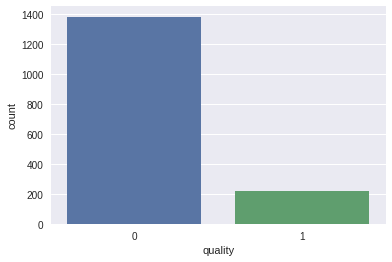

In [80]:
sns.countplot(wine['quality'])

In [0]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1, inplace=False), wine['quality'], test_size = 0.2, random_state = 42)

In [0]:
#Applying Standard scaling to get optimized result
sc = MinMaxScaler()

In [0]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Aprendizagem de máquina 2

In [86]:
model = svm.SVC(kernel='linear', gamma='auto', C=1, degree=0.1, probability=False)
model.fit(x_train,y_train) # nós treinamos o algoritmo com os dados de treinamento e a saída de treinamento
y_predicted=model.predict(x_test) # agora passamos os dados de teste para o algoritmo treinado

# Para verificar o desempenho, é necessário passar a saída obtida pelo modelo e a esperada
print('A acurácia do SVM linear é:',metrics.accuracy_score(y_predicted,y_test)) # agora nós verificamos a acurácia do algoritmo.


A acurácia do SVM linear é: 0.853125


In [87]:
model = svm.SVC(kernel='rbf', gamma='auto', C=1, degree=0.1, probability=False)
model.fit(x_train,y_train) # nós treinamos o algoritmo com os dados de treinamento e a saída de treinamento
y_predicted=model.predict(x_test) # agora passamos os dados de teste para o algoritmo treinado

# Para verificar o desempenho, é necessário passar a saída obtida pelo modelo e a esperada
print('A acurácia do SVM radial é:',metrics.accuracy_score(y_predicted,y_test)) # agora nós verificamos a acurácia do algoritmo.


A acurácia do SVM radial é: 0.853125


In [88]:
model = svm.SVC(kernel='poly', gamma='auto', C=1, degree=0.1, probability=False)
model.fit(x_train,y_train) # nós treinamos o algoritmo com os dados de treinamento e a saída de treinamento
y_predicted=model.predict(x_test) # agora passamos os dados de teste para o algoritmo treinado

# Para verificar o desempenho, é necessário passar a saída obtida pelo modelo e a esperada
print('A acurácia do SVM polinomial é:',metrics.accuracy_score(y_predicted,y_test)) # agora nós verificamos a acurácia do algoritmo.


A acurácia do SVM polinomial é: 0.853125


In [89]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia da regressão logística é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia da regressão logística é: 0.853125


In [90]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia das árvores de decisão é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia das árvores de decisão é: 0.7125


In [91]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_predicted=model.predict (x_test)
print('A acurácia do KNN é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do KNN é: 0.85


In [92]:
model=ensemble.RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, n_jobs=-1, bootstrap=True)
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia do random forest é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do random forest é: 0.8375


In [93]:
model=naive_bayes.GaussianNB()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia do naive bayes é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do naive bayes é: 0.821875


In [94]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=50), algorithm="SAMME", n_estimators=100)
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
print('A acurácia do adaboost é:',metrics.accuracy_score(y_predicted,y_test))

A acurácia do adaboost é: 0.721875


In [95]:
model=MLPClassifier(
    max_iter = 1000,
    momentum = 0.25,
    learning_rate_init = 0.13,
    hidden_layer_sizes = (12,),
    solver = 'lbfgs',
    learning_rate = 'invscaling',
    activation = 'relu',
    early_stopping = True,
    shuffle = True,
    batch_size = 2,
    random_state = 2567
)
model.fit(x_train,y_train.astype(str))
y_predicted=model.predict(x_test)
print('A acurácia da rede neural é:',metrics.accuracy_score(y_predicted,y_test.astype(str)))

A acurácia da rede neural é: 0.821875
